In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import warnings
from collections import Counter

In [2]:
df = pd.read_csv('full3.csv') 
print(df.shape)
df=df.dropna()
df.isna().any()
Counter(df["PCOS"])

(540, 11)


Counter({1: 220, 0: 320})

In [3]:
df.dtypes

PCOS               int64
Age                int64
BMI              float64
Cycle              int64
Weightgain         int64
hairgrowth         int64
Skindarkening      int64
Hairloss           int64
Pimples            int64
Fastfood           int64
RegExercise        int64
dtype: object

In [4]:
target_column = ['PCOS'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PCOS,540.0,0.407407,0.491807,0.000000,0.000000,0.000000,1.000000,1.0
Age,540.0,0.652508,0.119121,0.020833,0.562500,0.645833,0.729167,1.0
BMI,540.0,0.089762,0.042012,0.048246,0.078572,0.087469,0.096244,1.0
Cycle,540.0,0.648148,0.228523,0.500000,0.500000,0.500000,1.000000,1.0
Weightgain,540.0,0.427778,0.495215,0.000000,0.000000,0.000000,1.000000,1.0
hairgrowth,540.0,0.357407,0.479681,0.000000,0.000000,0.000000,1.000000,1.0
Skindarkening,540.0,0.370370,0.483352,0.000000,0.000000,0.000000,1.000000,1.0
Hairloss,540.0,0.437037,0.496480,0.000000,0.000000,0.000000,1.000000,1.0
Pimples,540.0,0.396296,0.489581,0.000000,0.000000,0.000000,1.000000,1.0
Fastfood,540.0,0.416667,0.493464,0.000000,0.000000,0.000000,1.000000,1.0


In [5]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
print(X_train.shape); print(X_test.shape)


(432, 10)
(108, 10)


In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7407407407407407


In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


In [9]:
y_pred=clf.predict(X_test)
y_pred = (y_pred>0.5)

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

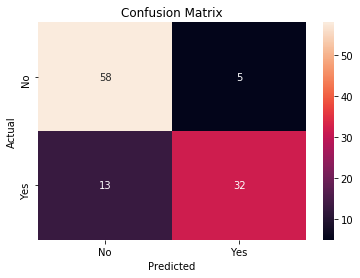

In [10]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test,y_pred)
ax =plt.subplot()
sns.heatmap(cn,annot =True,ax = ax);

ax.set_xlabel('Predicted') ; ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(('No','Yes')); ax.yaxis.set_ticklabels(('No','Yes'))

In [11]:
import pickle
import joblib
filenames = 'Pcos.pkl'
joblib.dump(clf,filenames)

['Pcos.pkl']